<a href="https://colab.research.google.com/github/mayait/ClaseMachineLearning/blob/main/SupervisedLearning/Classification/DecisionTreeTrainingTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

# Árbol de decisión

Imagina que estás planificando las actividades de la próxima semana. Las cosas que harás dependerán en gran medida de si tus amigos tienen tiempo y del tiempo que haga afuera.

![](https://github.com/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/img/tree_1.png?raw=1)

Este cuadro establece reglas de decisión simples, que lo ayudan a decidir qué hacer la próxima semana en función de algunos otros datos. En este caso, es la disponibilidad y las condiciones climáticas de tus amigos.

Los árboles de decisión hacen lo mismo. 

**Construyen un conjunto de reglas de decisión en forma de estructura de árbol, lo que le ayuda a predecir un resultado a partir de los datos de entrada.**

____


# Terminología
*   Nodo raíz: población completa o muestra
*   Ramificación
*   Nodo de decisión
*   Nodo terminal y hoja
*   Poda
*   Rama/sub-árbol
*   Nodos padre e hijo
![](https://julianmaya.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F43100fb8-8de3-4c6e-9828-d368ea194cba%2FUntitled.png?table=block&id=13a29d59-7a16-4b1f-b9b6-d3760d80cbf1&spaceId=42f304d0-48ef-446b-8385-5c22fd3187f7&width=2000&userId=&cache=v2)

____

## **Tipos de árboles**

Los árboles se pueden clasificar en dos tipos que son:

1. Árboles de regresión en los cuales la variable respuesta y es cuantitativa.
    
2. Árboles de clasificación en los cuales la variable respuesta y es cualitativa.

![https://fhernanb.github.io/libro_mod_pred/images/tipos_arboles.png](https://fhernanb.github.io/libro_mod_pred/images/tipos_arboles.png)

## Árbol de regresión

![https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_regresion.png](https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_regresion.png)

## Árbol de clasificación

![https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_clasi.png](https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_clasi.png)


## Ventajas

Existen múltiples razones por las que los árboles de decisión son uno de los algoritmos de aprendizaje automático de referencia en las aplicaciones de la vida real:

- Intuitivo
- Informativo
- Escalable
- Util en exploración de datos: identificar importancia de variables a partir de cientos de variables.
- Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
-  El tipo de datos no es una restricción

## Desventajas

- Sobreajuste
- Pérdida de información al categorizar variables continuas
- Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

## Business Use-Cases

Los árboles de decisión imitan la toma de decisiones humana y, por lo tanto, se pueden usar en una variedad de entornos comerciales.
Las empresas suelen utilizarlos para predecir resultados futuros. Por ejemplo:

- ¿Qué cliente se mantendrá fiel y cuál abandonará? (Árbol de decisión de clasificación)
- ¿En cuánto podemos aumentar las ventas de un cliente, dadas sus opciones de productos? (Árbol de decisión de regresión)
- ¿Qué artículo debo recomendar a los lectores de mi blog a continuación? (Árboles de decisión de clasificación)


____

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


sns.set(rc={'figure.figsize':(20,20)})


# Descargar el archivo automaticamente 
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/bank/bank-full.csv

--2023-02-28 22:15:28--  https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/bank/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv.1’

bank-full.csv.1     100%[===================>]   4.40M  --.-KB/s    in 0.02s   

2023-02-28 22:15:28 (226 MB/s) - ‘bank-full.csv.1’ saved [4610348/4610348]



---
# Ejercicio 1

Dataset: [Credit](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

**Source:**

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.There are four datasets:1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Attribute Information:**

```
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. # other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') # social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



## 1. 🌶️ 🐕  


> Importa en el dataframe ```df``` el archivo ```bank-full.csv```, toma nota que el separador es punto y coma.

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7883,54,blue-collar,married,primary,no,-636,yes,no,unknown,30,may,324,3,-1,0,unknown,no
43378,40,admin.,married,secondary,no,3126,yes,no,cellular,30,mar,186,2,90,5,failure,no
16807,30,admin.,married,tertiary,no,0,yes,no,cellular,24,jul,209,2,-1,0,unknown,no
26108,35,services,married,primary,no,31,no,yes,cellular,19,nov,131,3,133,3,failure,no
9823,38,blue-collar,single,unknown,no,840,no,no,unknown,9,jun,176,6,-1,0,unknown,no
20148,56,blue-collar,married,secondary,no,2750,no,no,cellular,11,aug,115,2,-1,0,unknown,no
38871,33,entrepreneur,married,tertiary,no,964,yes,no,cellular,18,may,97,1,180,3,failure,no
22100,53,blue-collar,married,secondary,no,-31,no,no,cellular,21,aug,82,8,-1,0,unknown,no
13855,40,blue-collar,married,secondary,no,2158,no,no,cellular,10,jul,277,1,-1,0,unknown,no
34734,46,management,married,tertiary,no,523,yes,no,cellular,6,may,105,4,366,2,failure,no


# 2. 🌶️ 🐕  Explora el DF

In [ ]:
df.____

# 3. 🌶️ 🐕  
Realiza un mapa de correlación de df.

In [ ]:
# 

# 4. 🌶️ 🐕  
> ¿Cuantas categorias tiene la variable ```month```?

> ¿Es un predictor?

> Elimina la columna ```month``` del dataframe ```df```

In [ ]:
# drop
df = _____

# 5. 🌶️ 🐕  
convierte las columnas categoricas en dummies, es decir valores de 1 y 0 para cada categoria y almacenalo en la variable df_dummies.

¿Cuantas columnas tienes ahora?

In [ ]:
df_dummies = ____

In [ ]:
df_dummies.sample(5)

# 6. 🌶️ 🐕  
> Realiza un mapa de correlación a df_dummies

¿Existe alguna correlación entre las variables?

In [ ]:
# sns.heatmap

# 7. 🌶️ 🐕  
Asigna los valores de ```y``` y ```X```


In [ ]:
y = _____
X = _____

# Dividir el dataframe en data de entrenamiento y data de test


In [ ]:
# Dividir el dataframe
# 70% training and 30% test

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)


## Entrena el modelo con ```train_X```y ```train_y```

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(train_X,train_y)

In [ ]:
# Dibuja el arbol
col_names_list = list(train_X.columns.values)
fig = plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, rounded=True,  feature_names=col_names_list)
plt.show()

## Predecimos los valores de entrenamiento de X

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(val_X)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

## Hacemos una función que entrene y pruebe el modelo 

In [ ]:
def tree_hyperparameters_fit(max_leaf_nodes,max_depth):
  model = DecisionTreeClassifier( max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
  model = model.fit(train_X, train_y)
  y_pred = model.predict(val_X)
  print("max_leaf_nodes:", max_leaf_nodes,"max_depth:", max_depth, "Accuracy:",metrics.accuracy_score(val_y, y_pred))

## Establecemos una lista de hiperparametros y corremos muchas versiones del modelo

In [ ]:
hyperparameters = [
    [5,4],
    [2,2],
    [4,4],
    [10,10],
    [20,20],
    [10000,10000],
    [100,100]
  ]

In [ ]:
for hp in hyperparameters:
  tree_hyperparameters_fit(hp[0],hp[1])

# 8.
¿Cúal es la mejor combinación de hiperparametros?

Invesiga que otros hiperparametros existen de arbol de decisión en SKLEARN

# 🌶️ EJERCICIO 9


In [ ]:
# 🌶️ EJERCICIO 9

# 🌶️ Importar matriz de confusión / confusion_matrix and classification_report.
____

knn = KNeighborsClassifier(n_neighbors=6)

# 🌶️ Ajustar el modelo a los datos de entrenamiento / Fit the model.
____

# 🌶️ Predecir las etiquetas de los datos de prueba: y_pred
y_pred = ____

# 🌶️ Generar la matriz de confusión y el informe de clasificación / print the confusion matrix and classification report
print(____(____, ____))
print(____(____, ____))

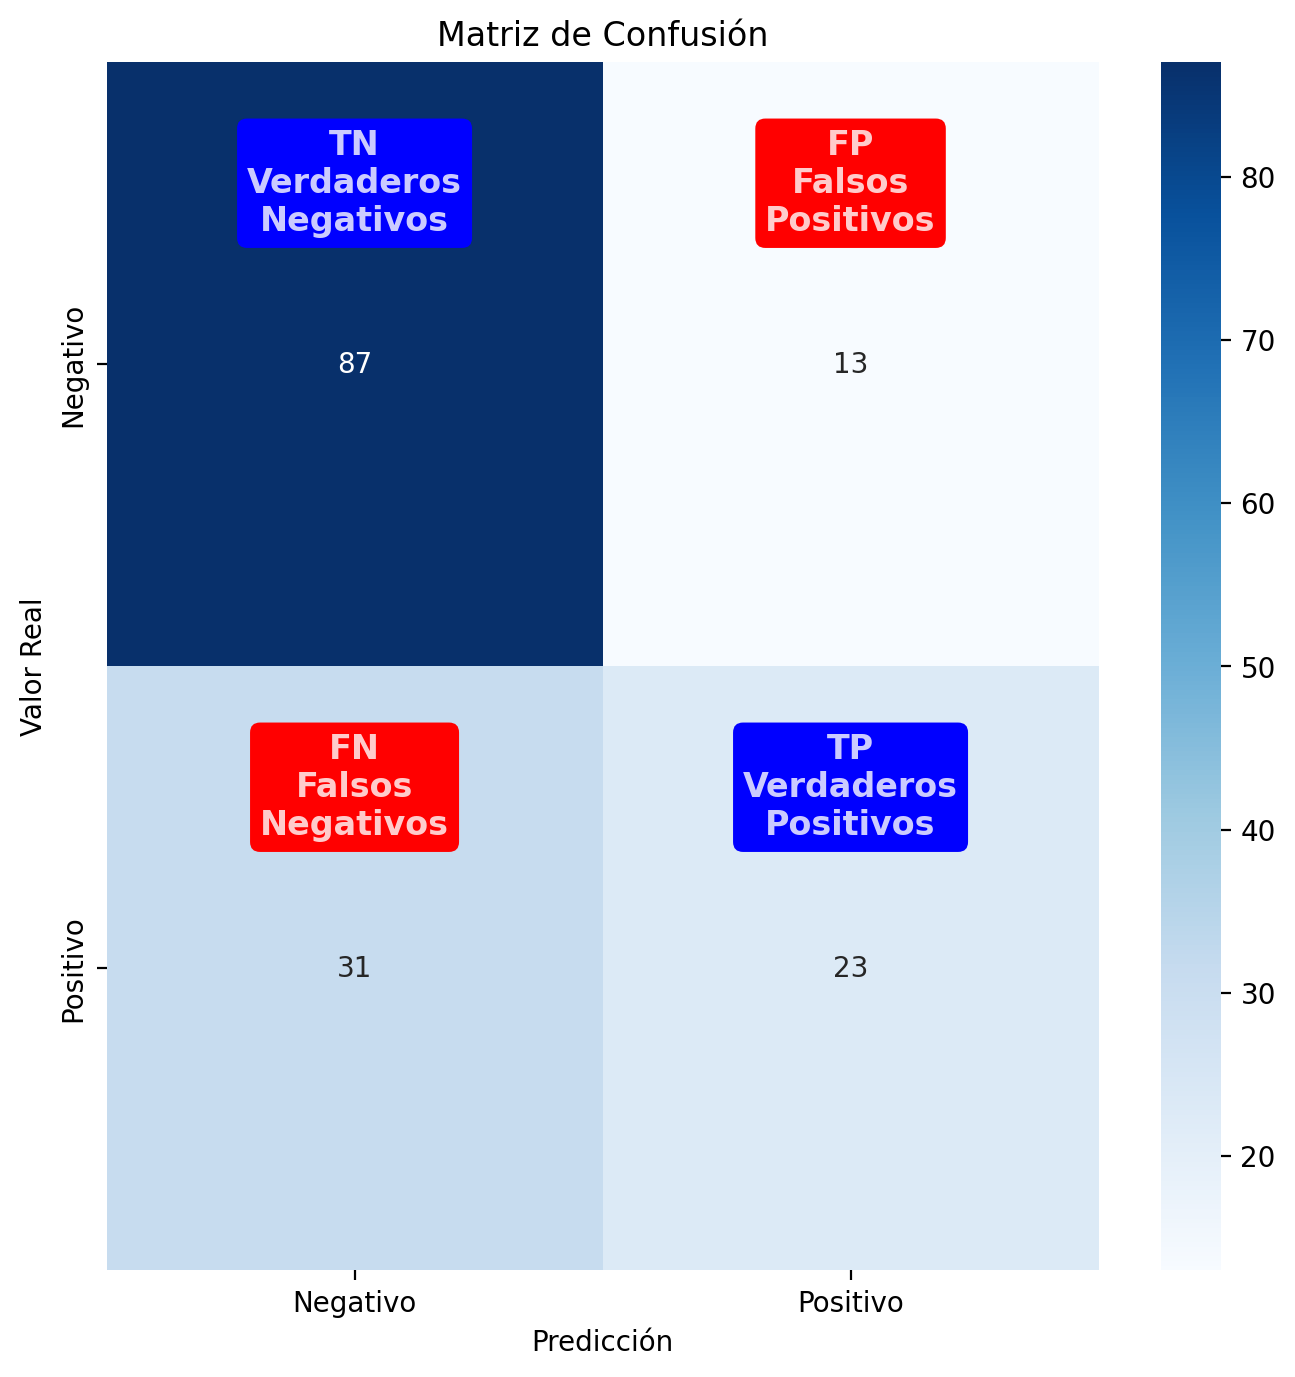

In [ ]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])

# Configurar las etiquetas del eje x e y
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
ax.set_title('Matriz de Confusión')

# Agregar las etiquetas a los cuadros de la matriz de confusión
plt.annotate('TN\nVerdaderos\nNegativos', xy=(0.0, 0.0), xytext=(0.5, 0.2), fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', weight='bold', alpha=0.8, bbox=dict(boxstyle='round', facecolor='blue', edgecolor='none'))
plt.annotate('FP\nFalsos\nPositivos', xy=(1.0, 0.0), xytext=(1.5, 0.2), fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', weight='bold', alpha=0.8, bbox=dict(boxstyle='round', facecolor='red', edgecolor='none'))
plt.annotate('FN\nFalsos\nNegativos', xy=(0.0, 1.0), xytext=(0.5, 1.2), fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', weight='bold', alpha=0.8, bbox=dict(boxstyle='round', facecolor='red', edgecolor='none'))
plt.annotate('TP\nVerdaderos\nPositivos', xy=(1.0, 1.0), xytext=(1.5, 1.2), fontsize=12, color='white', horizontalalignment='center', verticalalignment='center', weight='bold', alpha=0.8, bbox=dict(boxstyle='round', facecolor='blue', edgecolor='none'))


# Mostrar el gráfico
plt.show()